In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd


from rBoltzMach import boltzmanmachine
from metrics import pair_error, sequence_error, JS_divergence, p
plt.rcParams['font.size'] = 14

## Data selection

In [2]:
CASE=1           #select the data to be analysed
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
    
fname=dname+'/x_RBM_q0.1.dat'
v = np.loadtxt(fname, delimiter=" ",dtype=int)
v0 = np.copy(v)  #Copy original data to analyse later

In [3]:
perror = pair_error(v0, spin=False)
serror = sequence_error(v0, spin=False, vmin=0)
print(perror, serror)


9.457500000000001 22.6


## Network parameters

In [4]:
N = len(v)       #Number of rows
L = len(v[0])    #Set the number of visible variable
M = 3            #Set the number of hidden units

sigma = np.sqrt(4. / float(L + M))

print(f'each of N={N} data has L={L} digits')
print(f'The network has {L} visible units and {M} hidden units')
print(f'Initializing std {sigma}')

each of N=10000 data has L=20 digits
The network has 20 visible units and 3 hidden units
Initializing std 0.41702882811414954


## Defining training parameters

In [5]:
seed = 1      #set the random seed in order to reproduce results 
Amp_training  = 0.05      #set the coefficient that multiply the temp, Higher Amp -> Lower Temp
cdn  = 1        #set the number of phases


n_epochs = 100   #set the number of epochs


spin = True      #chose the kind of representation

if spin:
    GAP=2        #sigmoid takes into account energy difference =2
    v = 2*v - 1  #convert 0,1 -> -1,1
    vmin=-1
else:
    GAP=1
    vmin=0
    
Algorithm = 'RMSprop'

amp_list = [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

## Model Training

0.05 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

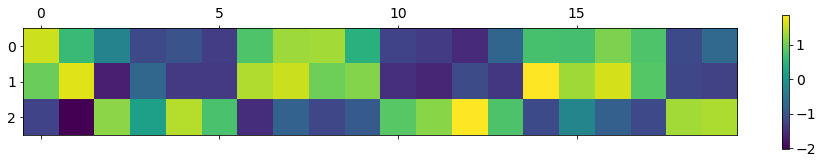

100
99 	 ...Done!
0.1 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

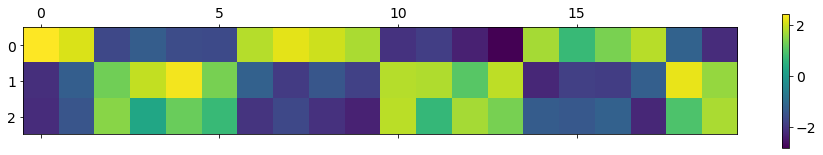

100
99 	 ...Done!
0.15 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

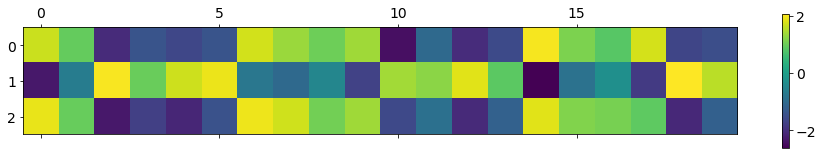

100
99 	 ...Done!
0.2 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

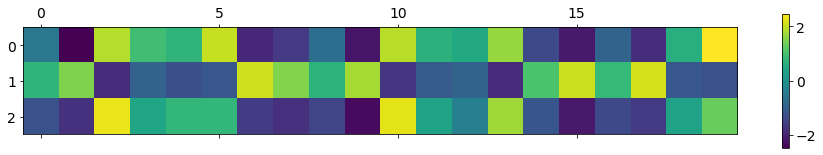

100
99 	 ...Done!
0.25 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

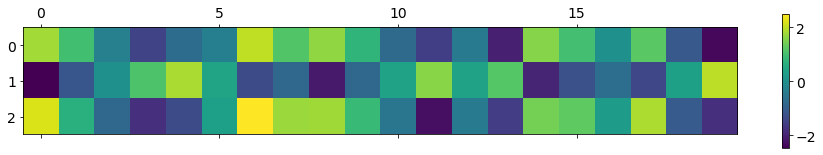

100
99 	 ...Done!
0.3 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

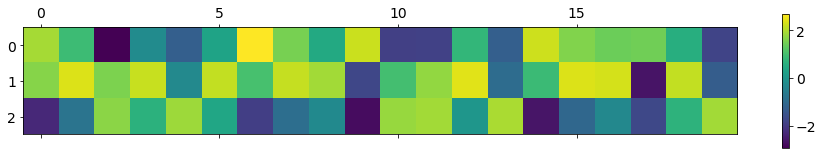

100
99 	 ...Done!
0.35 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

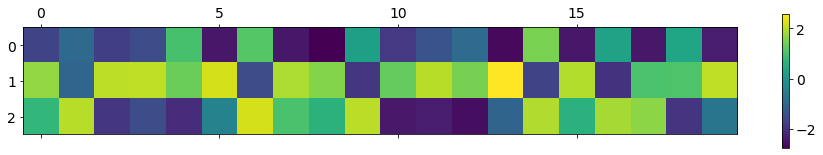

100
99 	 ...Done!
0.4 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

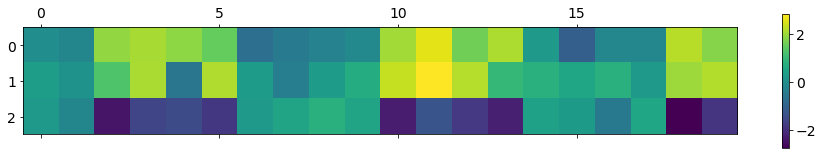

100
99 	 ...Done!
0.45 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

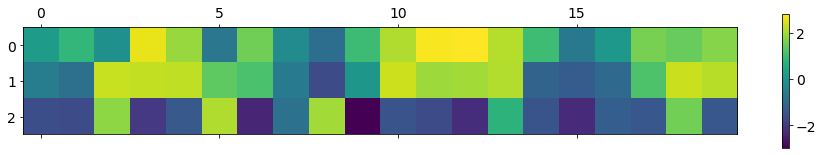

100
99 	 ...Done!
0.5 01234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798

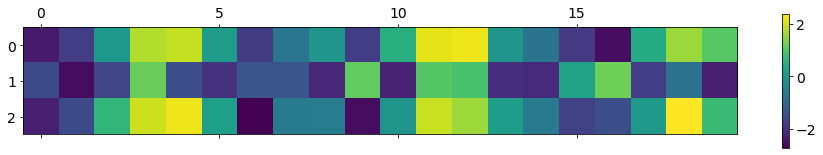

100
99 	 ...Done!


In [7]:
# random seed for reproducibility
np.random.seed(seed)

# learning rate
l_rate = 1e-3

# minibatch
mini_batch = 500

# train model
print('===================================================')
for amp in amp_list:
    
    rbm = boltzmanmachine(L,M,sigma,vmin=vmin, spin=spin)
    print(amp, end=' ')
    for epoch in range(n_epochs):
        # aggregate normalization of batch statistics and learning rate
        for k in range(N):
            rbm.train(data=v[k],
                      learning_rate=l_rate,
                      batch_size=mini_batch,
                      n_contrastive_div=cdn,
                      Amp_training=amp,
                      Algorithm=Algorithm)

        # randomize the order of input data
        np.random.shuffle(v)
        if epoch==n_epochs-1:
            plt.matshow(rbm.w.T)
            plt.colorbar()
            plt.show()
            print(epoch+1)
        print(epoch, end='')
    
    if spin:
        file_name='Models/'+str(Algorithm)+'_'+str(amp).replace('.','')+'_'+str(cdn)+'_spin'+'.npz'
    else:
        file_name='Models/'+str(Algorithm)+'_'+str(amp).replace('.','')+'_'+str(cdn)+'.npz'
    rbm.save_model(file_name)

    print(' \t ...Done!')
    